### Project title: Simulating average monthly national house prices in Ireland 

##### Project 1 for Programming for Data Analysis. Semester 2, HDip in Data Analytics at ATU, Galway 2023/24 
##### Author: Shane Keenan 
##### status: ongoing 
##### Submission due date: 05/12/2023

---


### Problem statement (from lecturer Brian McGinley)
For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set.

---

## Contents 

1. Introduction and rationale 
2. Objective 
3. Collecting ,processing and visualising the data sets 
4. Exploratory data analysis  
5. Linear regression - model variable relationships 
6. Train model using split data set 
7. Use model to simulate data for test 
8. Evaluate 


### 1. Introduction and rationale 

---


Choosing a real-world phenomenon is a more difficult task than it first seems. Having initially considered taking on some grande data set such as "*the weather*" or "*population collapse*" [1], I thought better of it and went for something more close to home (for me currently). I chose the houseing market. 

The average national monthly house price (*price*) is my primary variable of interest. 

This is a definitely a multi-variable phenomona with many contributing factors, however I wanted to normalise the data set to really only focus on economic and supply/demand indicators. Therefore variables such as location, square meterage, number of bedrooms, number of bathrooms, building energy rating (BER), year built and other amenities, although are very important in determining house price, are not be included and we assume every house is identical and in the same location. [2,3]. In essense, we are exploring the average house nationwide.   

The 4 dependent variables that I will consider in this project, in addition to the primary variable - house price (*price*), are the housing supply (*supp*), interest rates (*intra*), speculative demand (*deman*), economy (*econ*). 

Other factors (subfactors) which were considered or can be considered subfactors to the variables were; unemployment rate (inversely related to *econ* and *deman*), wage growth (positively related into *econ* and *deman*), mortgage availability (could be an additional valiable on its own based on the current bank lending policies), consumer condifdence/affordability (related to *econ*, income and *supp*), population increase (related *demand*) and current rental prices/stock (correlated to *supp* and *demand*).


List of variables included 

- *price* - average national monthly house price 
- *supp*   - average monthly housing supply 
- *intra*  - interest rates 
- *deman* - current speculative demand
- *econ* - economic growth 



#### References 
[1] Elon Musk: https://thehill.com/changing-america/sustainability/565224-elon-musk-says-population-collapse-potentially-the-greatest/


Factors affecting housing market

[2] https://www.economicshelp.org/blog/377/housing/factors-that-affect-the-housing-market/

[3] https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp



---

### 2. Objective 
---

The houseing market is a complicated system but ulimately can be modelled/simulated using sets of data in a time series. e.g. house price as a funciton of time. 

My objective in this project is to gather enough existing historic data on a number of housing market variables, determine their ralationship to each other using exploratory data analysis, split this data set into train and test,  generate a model for the train data using linear regression to predict future house prices in the test time period and then compare the modelled data with the test date. 

---

### 3. Collecting and processing the data 

---

### 3.1 Date range 

Let's consider the average national monthly house price from January 1975 - March 2008. 
My rationale here is that I was able to locate this data set from the CSO.ie website which will allow comparsion to be made with the simulated data.


Types of variables - all variables are numeric variables 
 
- *price* - average national monthly house price - in Euros - variable = integer
- *supp*   - average monthly housing supply - in number - variable= integer (int64)
- *intra*  - interest rates - in percentage %, variable type = float (float64)
- *deman* - current speculative demand - as a ratio of the population - population and econ - 
- *econ* - economic growth - as a ratio - income growth and natioanl GDP? 


#### References 

CSO data for Irish market 

[4] Interest rates: https://data.cso.ie/table/FIM09

[5] House prices: https://data.cso.ie/table/HSA06

[6] Population: https://data.cso.ie/table/PEA01

[7] Income : https://data.cso.ie/table/NAH07

[8] Housing supply: https://www.cso.ie/en/releasesandpublications/ep/p-mip/mip2015/econ/eh/

[9] Exchequer Account (Historical Series): https://data.cso.ie/table/FIQ02

[10] Stock exchange indices: https://data.cso.ie/table/FIM05


#### Import revelvant packages for python 

In [316]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdates 
from matplotlib.ticker import MultipleLocator
import math as m

### 3.2 Import real data sets - .csv files saved from CSO.ie website. 

#### Historic interest rates 

In [417]:
real_intra = pd.read_csv('C:\\Users\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Programming for Data Analysis\\prog_data_analysis\\project1\\interest_rates.csv', names = ['date', 'r_intra'])
# the interest rate data is already in the correct monthly data form so i don't need to do anything only remove the date column and add to the main dataframe 
real_intra.head(2) 

,date,r_intra
0,1975M01,11.25
1,1975M02,11.25


In [439]:
# make a new date dataframe for the monthly data - 399 months in date range 
idx = pd.date_range("1975-01-01", periods = 399, freq ="M" )  # stating Jan 1975 - Mar 2008 - 399 months of data 
df_idx = pd.DataFrame(idx, columns=['Date'])
df_idx.head()
real_intra = real_intra.drop(columns=['date'])
real_intra_idx = pd.concat([df_idx, real_intra], axis = 1)
real_intra_idx.head(3) # it worked ! 

,Date,r_intra
0,1975-01-31,11.25
1,1975-02-28,11.25
2,1975-03-31,11.25


### Historic house prices 

In [378]:
real_price = pd.read_csv('C:\\Users\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Programming for Data Analysis\\prog_data_analysis\\project1\\house_prices.csv')
real_price.head(2) 

,Statistic Label,Quarter,Area,UNIT,VALUE
0,New House Prices,1975Q1,National,Euro,11887.0
1,New House Prices,1975Q1,Dublin,Euro,11858.0


In [381]:
# the house prices are reported quarterly, 
# this data also has useful categorical data. New House Prices/ Second hand house Prices and split Nationally and by city. 

real_price_filtered = real_price.loc[(real_price['Area'] == 'National') & (real_price['Statistic Label'] == 'New House Prices')]
real_price_filtered1 = real_price_filtered.reset_index(drop=True)
real_price_filtered1.head(3)


,Statistic Label,Quarter,Area,UNIT,VALUE
0,New House Prices,1975Q1,National,Euro,11887.0
1,New House Prices,1975Q2,National,Euro,12837.0
2,New House Prices,1975Q3,National,Euro,13269.0


In [382]:
# Convert the "Quarter" column to the correct datetime format   - have spent ages trying to get this to work but this won't read in the 1975Q1 - has trouble with the Q 
#real_price['Quarter'] = pd.to_datetime(real_price['Quarter'], format='%YYYY%Q')

# make a new date dataframe for the quarterly data - 168 Quarters in date range 
idx2 = pd.date_range("1975-01-01", periods = 168, freq ="Q" )
#idx2 = pd.date_range("1975-01-01", periods = 2352, freq ="Q" )
df_idx2 = pd.DataFrame(idx2)
df_idx2.index = range(len(df_idx2))
df_idx2 = pd.DataFrame({'date': idx2})
df_idx2.head(3) # works well

,date
0,1975-03-31
1,1975-06-30
2,1975-09-30


In [383]:
real_price_filtered_idx2 = pd.concat([df_idx2, real_price_filtered1], axis = 1)
real_price_filtered_idx2.head(3) # it worked ! 


,date,Statistic Label,Quarter,Area,UNIT,VALUE
0,1975-03-31,New House Prices,1975Q1,National,Euro,11887.0
1,1975-06-30,New House Prices,1975Q2,National,Euro,12837.0
2,1975-09-30,New House Prices,1975Q3,National,Euro,13269.0


Text(0, 0.5, 'Interest rates [%]')

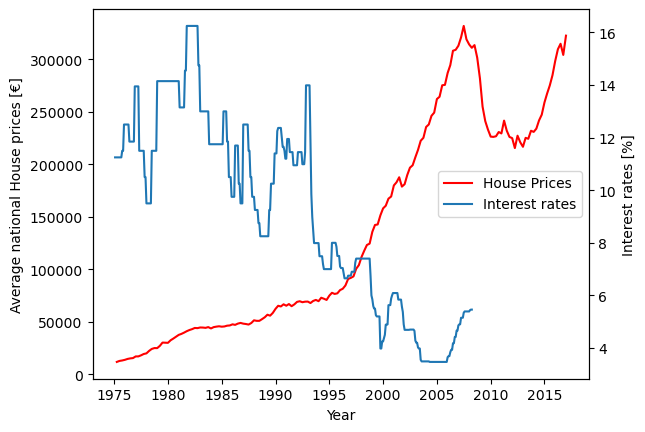

In [300]:
#fig, ax1 = plt.subplots()
#ax1.set_xlabel('Year')
#ax1.set_ylabel('Average national House prices [\u20AC]')
#ax1.plot(real_price_filtered_idx2['date'], real_price_filtered_idx2['VALUE'], color='red', label='House Prices')
#ax1.tick_params(axis='y')
#ax1.legend(loc='lower left')

#ax2 = ax1.twinx()  
#ax2.set_ylabel('Interest rates [%]')  
#ax2.plot(data_wreal['Year/Month'], data_wreal['r_intra'], label='Interest rates')
#ax2.tick_params(axis='y')
#ax2.legend(loc='lower right')

# come back and redo plot with.. 
#all labels on one legend:  https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend

fig = plt.figure()
ax = fig.add_subplot(111)
lns1 = ax.plot(real_price_filtered_idx2['date'], real_price_filtered_idx2['VALUE'], color='red', label='House Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average national House prices [\u20AC]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(data_wreal['Year/Month'], data_wreal['r_intra'], label='Interest rates')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='center right')
ax2.set_xlabel('Year')
ax2.set_ylabel('Interest rates [%]')
#ax2.title('Population Estimates (Persons in April) 1950 - 2023')
#ax2.legend(loc=1)
#ax2.show()

#### Historic population 

In [155]:
real_pop = pd.read_csv('C:\\Users\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Programming for Data Analysis\\prog_data_analysis\\project1\\population.csv')
real_pop.head(20)

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN
5,Population Estimates (Persons in April),1950,0 - 4 years,Female,Thousand,NaN
6,Population Estimates (Persons in April),1950,0 - 14 years,Both sexes,Thousand,851.2
7,Population Estimates (Persons in April),1950,0 - 14 years,Male,Thousand,434.6
8,Population Estimates (Persons in April),1950,0 - 14 years,Female,Thousand,416.6
9,Population Estimates (Persons in April),1950,1 - 4 years,Both sexes,Thousand,249.1


In [309]:
real_pop_filtered = real_pop.loc[(real_pop['Age Group'] == 'All ages') & (real_pop['Sex'] == 'Both sexes')]
real_pop_filtered1 = real_pop_filtered.reset_index(drop=True) # reset the index for the filtered data 
real_pop_filtered1.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,All ages,Both sexes,Thousand,2969.0
1,Population Estimates (Persons in April),1951,All ages,Both sexes,Thousand,2960.6
2,Population Estimates (Persons in April),1952,All ages,Both sexes,Thousand,2952.9
3,Population Estimates (Persons in April),1953,All ages,Both sexes,Thousand,2949.0
4,Population Estimates (Persons in April),1954,All ages,Both sexes,Thousand,2941.2


In [305]:
idx3 = pd.date_range("1950-04-01", periods = 74, freq ="12M" )
#idx2 = pd.date_range("1975-01-01", periods = 2352, freq ="Q" )
df_idx3 = pd.DataFrame(idx3)
df_idx3.index = range(len(df_idx3))
df_idx3 = pd.DataFrame({'date': idx3})
df_idx3.head()

,date
0,1950-04-30
1,1951-04-30
2,1952-04-30
3,1953-04-30
4,1954-04-30


In [385]:
real_pop_filtered_idx3 = pd.concat([df_idx3, real_pop_filtered1], axis = 1)
real_pop_filtered_idx3.head(3) # it worked when the indexes are the same and the column length 

#trunate data to 1975 - 2008 


,date,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,1950-04-30,Population Estimates (Persons in April),1950,All ages,Both sexes,Thousand,2969.0
1,1951-04-30,Population Estimates (Persons in April),1951,All ages,Both sexes,Thousand,2960.6
2,1952-04-30,Population Estimates (Persons in April),1952,All ages,Both sexes,Thousand,2952.9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


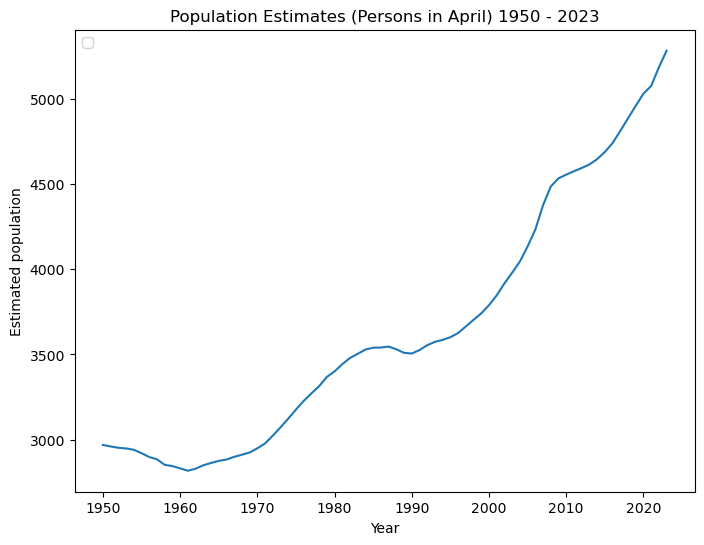

In [384]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(real_pop_filtered_idx3['Year'], real_pop_filtered_idx3['VALUE'])
plt.xlabel('Year')
plt.ylabel('Estimated population')
plt.title('Population Estimates (Persons in April) 1950 - 2023')
plt.legend(loc="upper left")
plt.show()

Text(0, 0.5, 'Estimated population')

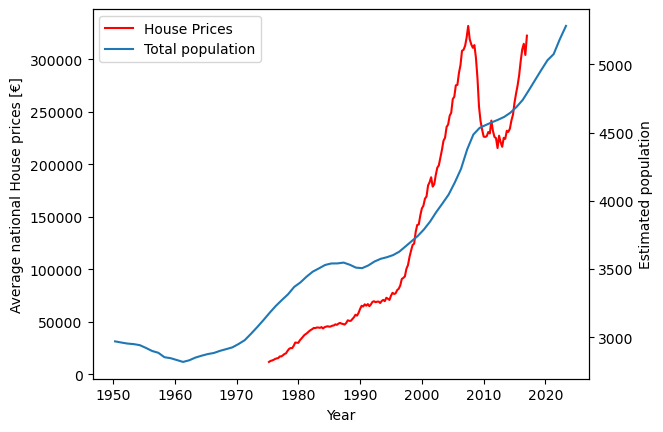

In [295]:
#all labels on one legend:  https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
fig = plt.figure()
ax = fig.add_subplot(111)
lns1 = ax.plot(real_price_filtered_idx2['date'], real_price_filtered_idx2['VALUE'], color='red', label='House Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average national House prices [\u20AC]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(real_pop_filtered_idx3['date'], real_pop_filtered_idx3['VALUE'], label = 'Total population')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax2.set_xlabel('Year')
ax2.set_ylabel('Estimated population')
#ax2.title('Population Estimates (Persons in April) 1950 - 2023')
#ax2.legend(loc=1)
#ax2.show()

In [413]:
real_pop_filtered_idx3['VALUE']


real_pop_filtered_idx3['VALUE_diff'] = real_pop_filtered_idx3['VALUE'].diff()
real_pop_filtered_idx3['VALUE_diff']

0       NaN
1      -8.4
2      -7.7
3      -3.9
4      -7.8
      ...  
69     73.6
70     71.4
71     44.8
72    109.3
73     97.6
Name: VALUE_diff, Length: 74, dtype: float64

In [ ]:

plt.plot(real_intra_idx['Date'], real_intra_idx['r_intra'], label = 'Interest rate' ) #check this works OK 
plt.xlabel('Year')
plt.ylabel('Interest rates in %')
plt.title('Historic monthly interest rates 1975 - 2008')
plt.legend(loc="upper right")
plt.show()



### Distributions in the data 

[0       NaN
 1      -8.4
 2      -7.7
 3      -3.9
 4      -7.8
       ...  
 69     73.6
 70     71.4
 71     44.8
 72    109.3
 73     97.6
 Name: VALUE_diff, Length: 74, dtype: float64]

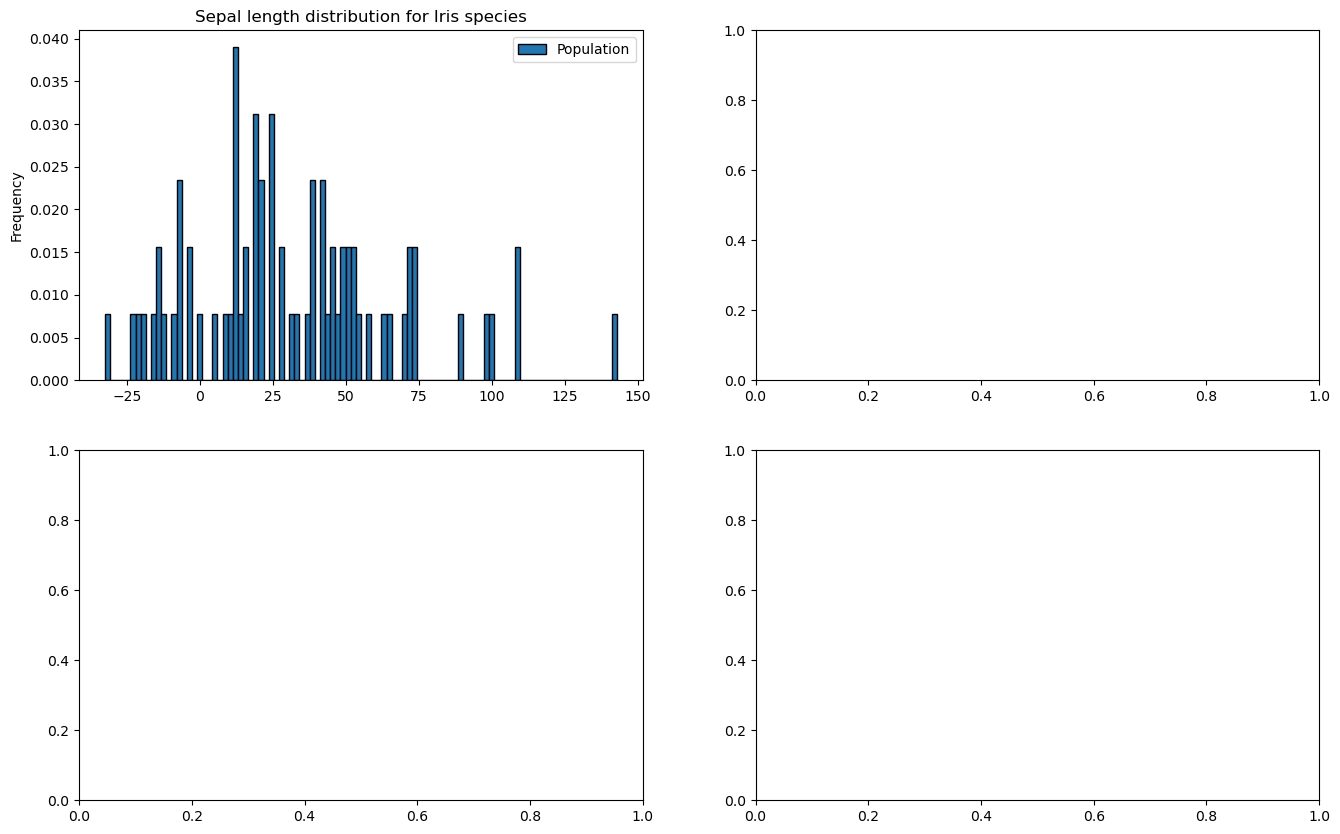

In [415]:
# histogram 
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
A = [real_pop_filtered_idx3['VALUE_diff']]
#B = [data['Sepal_Width_[cm]'][data.Species == 'Iris-setosa'], data['Sepal_Width_[cm]'][data.Species == 'Iris-virginica'], data['Sepal_Width_[cm]'][data.Species == 'Iris-versicolor']]
#C = [data['Petal_Length_[cm]'][data.Species == 'Iris-setosa'], data['Petal_Length_[cm]'][data.Species == 'Iris-virginica'], data['Petal_Length_[cm]'][data.Species == 'Iris-versicolor']]
#D = [data['Petal_Width_[cm]'][data.Species == 'Iris-setosa'], data['Petal_Width_[cm]'][data.Species == 'Iris-virginica'], data['Petal_Width_[cm]'][data.Species == 'Iris-versicolor']]
ax[0, 0].hist(A, bins = 100, density=True, label=('Population'), edgecolor='black')
ax[0, 0].set_title('Sepal length distribution for Iris species')
ax[0, 0].legend(loc='upper right')
#ax[0, 0].set_xlabel(cols[0])
ax[0, 0].set_ylabel('Frequency')
#ax[0, 1].hist(B, bins = 20, label=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'), edgecolor='black',)
#ax[0, 1].set_title('Sepal width distribution for Iris species')
#ax[0, 1].legend(loc='upper right')
#ax[0, 1].set_xlabel(cols[1])
#ax[0, 1].set_ylabel('Frequency')
#ax[1, 0].hist(C, bins = 20, label=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'), edgecolor='black',)
#ax[1, 0].set_title('Pedal length distribution for Iris species')
#ax[1, 0].legend(loc='upper right')
#ax[1, 0].set_xlabel(cols[2])
#ax[1, 0].set_ylabel('Frequency')
#ax[1, 1].hist(D, bins = 20, label=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'), edgecolor='black',)
#ax[1, 1].set_title('Pedal width distribution for Iris species')
#ax[1, 1].legend(loc='upper right')
#ax[1, 1].set_xlabel(cols[3])
#ax[1, 1].set_ylabel('Frequency')
A

In [ ]:






np.random.seed(10)  # seed for reproducibility
rng = np.random.default_rng()   # define the random number generator 

# Define the number of monthly data points between January 1975 - March 2008  
num_data_points = 399
# universal time for all 
time  = np.arange(num_data_points) #rng.random(num_data_points)

# supply should have an inverse relationship with house prices - high supply = lower prices, low supply = higer prices. 
# Simulate housing supply (supp) as a random integer number between 50 and 5000 - with a uniform distribution  -- should this be uniform? with perhaps a linear increase over time? 
# use .randint to get integers only  
y = (-0.5*time + 50) 
supp = np.random.randint(200, 250, num_data_points) + y

# interest rates should have a negative correlation on prices - higher interest rate - lower price 
# Simulate interest rates (intra) as a normal distribution with a mean of 3% and standard deviation of 10% ? needs thinking about - 
# needs to be positive only 

noise_intra = np.random.normal(0, 0.5, num_data_points)
# add in some trend..  based on economy 
x_intra = np.linspace(3, 10, num_data_points)
y_intra = 2* np.sin(time/20)
intra = y_intra + noise_intra

# economic growth should have a positive correlation with prices =- the better the economy higher wage growth - more deposeable income. 
# Simulate economic growth (econ) as a normal distribution with a mean of  X % and standard deviation of X %  --- needs thinking about
noise_econ = np.random.normal(0.03, 0.03, num_data_points)
# simulate the economy going good and then bad.. 
econ_amp = 5 
econ_period = 0.1 

time_econ = np.arange(num_data_points)
econ = econ_amp * np.abs((time % (1 / econ_period)) - (1 / (2 * econ_period)))



# Simulate current affordability (afford) as a random number between 0.5 and 1.5  - perhaps earns/house price  -- needs thinking about
afford = np.random.uniform(0.5, 1.5, num_data_points)

# Simulate speculative demand (deman)  -- lets assume demand is always steadily increasing as the population grows. us the population data from cso? 
# demand will positively influence price .. higher demand = higher prices 
# closely linked to population and interest rates - assume 2-5 % of the population are looking to purchase 
# deman = 0.05   
pop = 100000
y = (-0.5*x + 50) 
supp = np.random.randint(200, 250, num_data_points) + y
deman = supp/pop


# Simulate housing prices -- needs thinking about
price = 2000000*  econ * deman * afford / (intra * supp)  




data = pd.DataFrame({   # Create a DataFrame to store the simulated data
    'Year/Month': idx,
    'Housing_Supply': supp,
    'Interest_Rate': intra,
    'Speculative_Demand': deman,
    'Economic_Growth': econ,
    'Affordability': afford,
    'House_Price': price
})



# Display the first few rows of the simulated data
data.head(2)

In [ ]:
# Visualize the relationships
#fig, ax = subplot(2,2)
#ax1.plt.plot(data['Year/Month'], data['Housing_Supply'] )
#plt.xlabel('Year')
#plt.ylabel('Average monthly Housing supply ')
#plt.title('Simulated housing supply by month') 
#plt.xlim([4, 8])
#plt.ylim([0, 8])
#plt.legend(loc="upper left")
#plt.show()
#plt.plot(data['Year/Month'], data['Interest_Rate'] )
# g = sns.pairplot(data)
#plt.show()
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
A = [data['Year/Month'], data['Housing_Supply']]
B = [data['Year/Month'], data['Interest_Rate']]
C = [data['Year/Month'], data['Speculative_Demand']]
D = [data['Year/Month'], data['Interest_Rate']]
ax[0, 0].plot(A[0], A[1])
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('Housing Supply')
ax[0, 0].legend(loc='upper right')
ax[0, 0].set_title('')

ax[0, 1].plot(B[0], B[1])
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('Interest Rate [%]')
ax[0, 1].set_title('')

ax[1, 0].plot(C[0], C[1])
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('Speculative Demand')
ax[1, 0].legend(loc='upper right')
ax[1, 0].set_title('')

ax[1, 1].plot(D[0], D[1])
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('Economic Growth')
ax[1, 1].legend(loc='upper right')
ax[1, 1].set_title('')

plt.show()
